In [28]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import time
import math
from collections import namedtuple

# Лабораторная работа № 5
## Отсечение отрезков. Метод средней точки

In [34]:
lines = [
    [10, 400, 400, 500],
    [300, 300, 600, 200],
    [200, 100, 400, 300],
    [100, 50, 500, 200],
    [50, 70, 600, 600]
]
n = len(lines)

clip_rect = [100, 50, 400, 700] # x_min, y_min, x_max, y_max

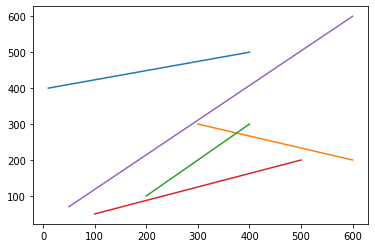

In [15]:
# plt.xlim([0, 1000])
# plt.ylim([0, 1000])

for i in range(n):
    plt.plot([lines[i][0], lines[i][2]], [lines[i][1], lines[i][3]])
plt.show()

In [40]:
def in_rectangle(x1, y1, x2, y2):
    return x1 > clip_rect[0] and x2 > clip_rect[0] and \
           x1 < clip_rect[2] and x2 < clip_rect[2] and \
           y1 > clip_rect[1] and y2 > clip_rect[1] and \
           y1 < clip_rect[3] and y2 < clip_rect[3]


def in_rec_point(x, y):
    return x > clip_rect[0] and y > clip_rect[1] and \
           x < clip_rect[2] and y < clip_rect[3]
        

def clip(x1, y1, x2, y2, buf):
    if math.dist([x1, y1], [x2, y2]) < 1:
        return
    
    if in_rectangle(x1, y1, x2, y2):
#     if in_rec_point(x1, y1) and in_rec_point(x2, y2):
        buf.append([x1, y1])
        buf.append([x2, y2])
    
    clip(x1, y1, (x1 + x2) / 2, (y1 + y2) / 2, buf)
    clip((x1 + x2) / 2, (y1 + y2) / 2, x2, y2, buf)


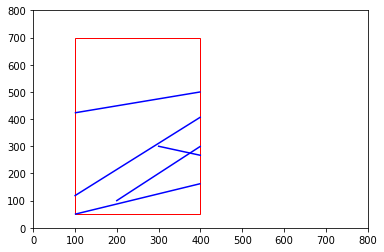

In [41]:
fig, ax = plt.subplots()
ax.add_patch(patches.Rectangle(
        (clip_rect[0], clip_rect[1]),
        clip_rect[2] - clip_rect[0],
        clip_rect[3] - clip_rect[1],
        fc='none',
        ec='red'
    ),
)

plt.xlim([0, 800])
plt.ylim([0, 800])


for i in range(n):
    buf = []
    clip(lines[i][0], lines[i][1], lines[i][2], lines[i][3], buf)
    buf.sort(key=lambda x: x[0])
    plt.plot([buf[0][0], buf[-1][0]], [buf[0][1], buf[-1][1]], 'b')
plt.show()
